<a href="https://colab.research.google.com/github/cheongyeechian/DLI/blob/main/Individual_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title: Phishing Website Detection using Machine Learning
This is the [research paper and github](https://github.com/asrith-reddy/Phishing-detector/blob/main/Project%20document.pdf) that i used.

To obtain the dataset, please download from [github](https://github.com/cheongyeechian/DLI/blob/main/Cheong_Yee_Chian/dataset_phishing.csv)

# Machine Learning Model
I am using **Logistic Regression** for this individual assignment and comparing my model’s accuracy with the Logistic Regression results reported by the author.

Below is my model code 👇🏻

Enjoy.

The model accuracy reported by the research author is:


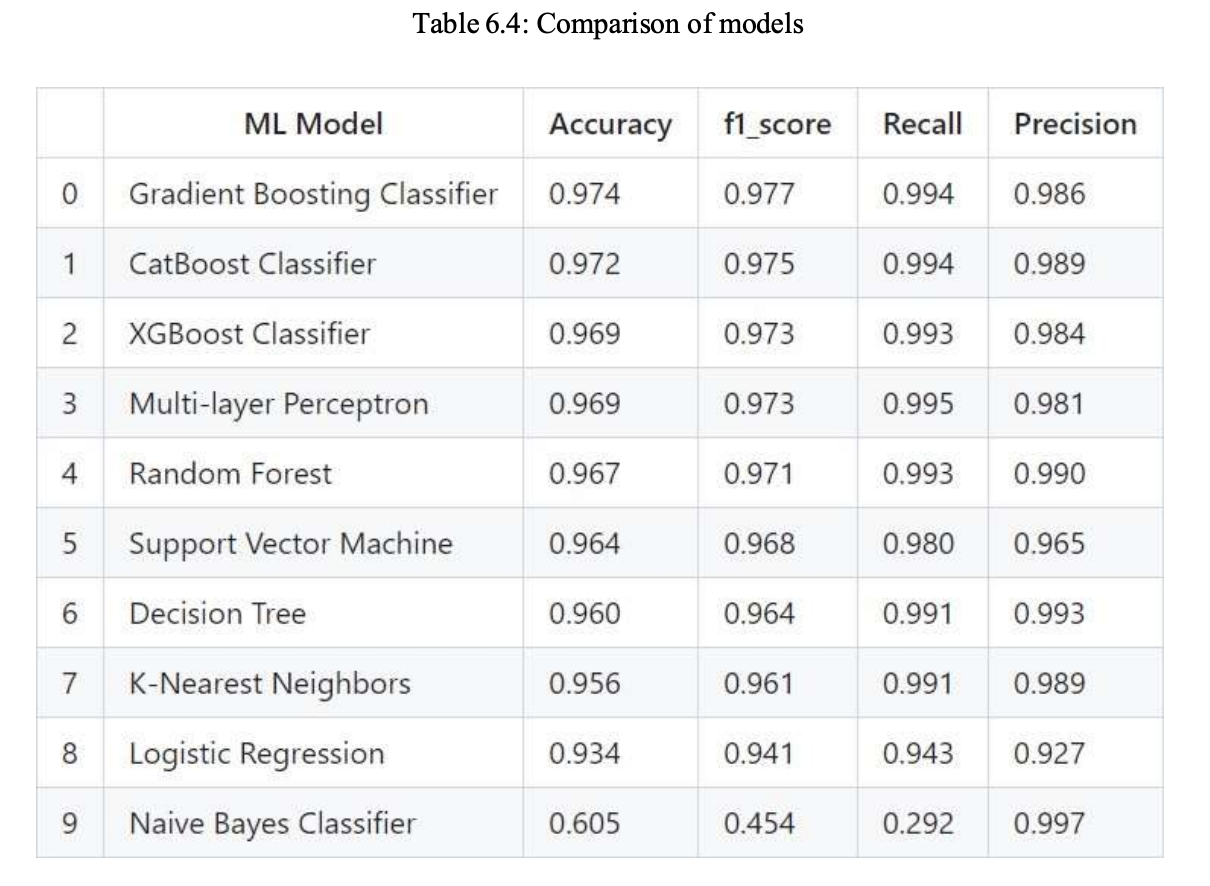




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import os


if not os.path.exists("dataset_phishing.csv"):
    try:
        # Download the file from Google Drive
        !gdown --id 1QrsbselQT_UPK81Pur_rigCKyZKpE9Zq -O dataset_phishing.csv
        print("Dataset downloaded successfully!")
    except Exception as e:
        print(f"Error downloading dataset: {e}")
        exit()

# Load the dataset
try:
    df = pd.read_csv("dataset_phishing.csv")
    print("Dataset loaded successfully!")
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
    print("\nShape of the dataset (rows, columns):")
    print(df.shape)
    print("\nInformation about the dataset (data types, non-null counts):")
    df.info()
    print("\nDistribution of the target variable (status):")
    print(df['status'].value_counts())
except FileNotFoundError:
    print("Error: 'dataset_phishing.csv' not found after download attempt.")
    exit()
except Exception as e:
    print(f"An error occurred during data loading: {e}")
    exit()


print("\n--- Data Cleaning and Preprocessing ---")

# Drop the 'url' column as it's not needed for the model
if 'url' in df.columns:
    df = df.drop("url", axis=1)
    print("'url' column dropped.")
else:
    print("'url' column not found.")

# Encode the 'status' column using LabelEncoder
if 'status' in df.columns:
    label_encoder = LabelEncoder()
    df["status_encoding"] = label_encoder.fit_transform(df["status"])
    status_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(f"Status column encoded. Mapping: {status_mapping}")
    df = df.drop("status", axis=1)
    print("Original 'status' column dropped.")
else:
    print("'status' column not found or already processed.")


# Handle -1 values in 'domain_age' and 'domain_registration_length'
print("\nHandling -1 values in 'domain_age' and 'domain_registration_length'...")

# Calculate the mean of the relevant columns excluding -1
mean_domain_age = df[df['domain_age'] != -1]['domain_age'].mean()
mean_domain_registration_length = df[df['domain_registration_length'] != -1]['domain_registration_length'].mean()

# Replace -1 values with the calculated means
df['domain_age'] = df['domain_age'].replace(-1, mean_domain_age)
df['domain_registration_length'] = df['domain_registration_length'].replace(-1, mean_domain_registration_length)

print(f"Replaced -1 in 'domain_age' with mean: {mean_domain_age:.2f}")
print(f"Replaced -1 in 'domain_registration_length' with mean: {mean_domain_registration_length:.2f}")


# Define features (X) and target (y)
X = df.drop('status_encoding', axis=1)
y = df['status_encoding']

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set features (X_train) shape: {X_train.shape}")
print(f"Testing set features (X_test) shape: {X_test.shape}")
print(f"Training set target (y_train) shape: {y_train.shape}")
print(f"Testing set target (y_test) shape: {y_test.shape}")

print("\nPreprocessing complete. Data is ready for model training.")

Dataset loaded successfully!

First 5 rows of the dataset:
                                                 url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  wh

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from scipy.stats import uniform
from scipy.stats import loguniform

print("\n--- Logistic Regression Model Training with Enhancements ---")

# Scale the features
scaler_lr = StandardScaler()
X_train_scaled_lr = scaler_lr.fit_transform(X_train)
X_test_scaled_lr = scaler_lr.transform(X_test)
print("Features scaled for Logistic Regression.")

# Add polynomial features
# Adjust degree based on problem - starting with degree 2
# include_bias=False to avoid adding a column of ones
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled_lr)
X_test_poly = poly.transform(X_test_scaled_lr)
print(f"Added polynomial features. New training shape: {X_train_poly.shape}")


print("\nPerforming RandomizedSearchCV for Hyperparameter Tuning...")
# Optimize the C parameter using RandomizedSearchCV
# Using a log-uniform distribution for C is more suitable for scale-invariant search
param_dist = {'C': loguniform(1e-3, 1e3)}


# n_iter controls how many parameter combinations are sampled
random_search = RandomizedSearchCV(
    LogisticRegression(random_state=42, penalty='l2', solver='lbfgs', max_iter=2000),
    param_distributions=param_dist,
    n_iter=10,  # I use 10 parameter settings for sampled
    cv=3,  # Reduce folds to speed up
    scoring='accuracy',
    random_state=42,
    n_jobs=-1  # Use all available cores
)
random_search.fit(X_train_poly, y_train)

best_C = random_search.best_params_['C']
print(f"Best C found by RandomizedSearchCV: {best_C}")

# Define the Logistic Regression model with the best C found
model_lr = LogisticRegression(random_state=42, C=best_C, penalty='l2', solver='lbfgs', max_iter=2000)

# Train the model on the data with polynomial features
print("\nTraining Logistic Regression Model with best C and polynomial features...")
model_lr.fit(X_train_poly, y_train)
print("Model training complete.")


print("Evaluating Logistic Regression Model...")
y_pred_lr = model_lr.predict(X_test_poly)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

print(f"\nAccuracy (Logistic Regression): {accuracy_lr:.4f}")
print(f"Precision (Logistic Regression): {precision_lr:.4f}")
print(f"Recall (Logistic Regression): {recall_lr:.4f}")
print(f"F1-Score (Logistic Regression): {f1_lr:.4f}")

print("\nConfusion Matrix (Logistic Regression):")
print(conf_matrix_lr)

print("\n--- Confusion Matrix Breakdown (Logistic Regression) ---")
TN_lr, FP_lr, FN_lr, TP_lr = conf_matrix_lr.ravel()
print(f"True Negatives (Legitimate Correctly Classified): {TN_lr}")
print(f"False Positives (Legitimate Classified as Phishing): {FP_lr}")
print(f"False Negatives (Phishing Classified as Legitimate): {FN_lr}")
print(f"True Positives (Phishing Correctly Classified): {TP_lr}")


--- Logistic Regression Model Training with Enhancements ---
Features scaled for Logistic Regression.
Added polynomial features. New training shape: (9144, 3915)

Performing RandomizedSearchCV for Hyperparameter Tuning...
Best C found by RandomizedSearchCV: 0.008629132190071854

Training Logistic Regression Model with best C and polynomial features...
Model training complete.
Evaluating Logistic Regression Model...

Accuracy (Logistic Regression): 0.9611
Precision (Logistic Regression): 0.9631
Recall (Logistic Regression): 0.9589
F1-Score (Logistic Regression): 0.9610

Confusion Matrix (Logistic Regression):
[[1101   42]
 [  47 1096]]

--- Confusion Matrix Breakdown (Logistic Regression) ---
True Negatives (Legitimate Correctly Classified): 1101
False Positives (Legitimate Classified as Phishing): 42
False Negatives (Phishing Classified as Legitimate): 47
True Positives (Phishing Correctly Classified): 1096
